In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sp

In [215]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('train_wn75k28.csv')
train_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
train_df.shape

(39161, 19)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [4]:
train_df.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [8]:
train_df['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [9]:
not_purchased = train_df[train_df['buy']==0]
purchased = train_df[train_df['buy']==1]

ratio =  len(not_purchased)/len(purchased)

In [10]:
ratio

18.6001001001001

In [14]:
zero_purchased = train_df[train_df['products_purchased'].isna()]
len(zero_purchased)

20911

In [15]:
zero_purchased['buy'].value_counts()

0    19866
1     1045
Name: buy, dtype: int64

In [16]:
zero_purchased['campaign_var_1'].value_counts()

6     2161
7     2080
5     2044
4     1983
8     1884
3     1849
9     1678
2     1568
10    1412
11    1155
12     906
13     660
1      618
14     474
15     310
16     129
Name: campaign_var_1, dtype: int64

In [20]:
zero_purchased['campaign_var_1'][zero_purchased['buy']==1].value_counts()

3     135
4     135
5     133
6     127
7     122
2     119
8      91
9      53
10     42
1      41
11     27
12     14
13      2
14      2
15      2
Name: campaign_var_1, dtype: int64

In [21]:
not_signedup = train_df[train_df['signup_date'].isna()]
not_signedup.shape

(15113, 19)

In [23]:
len(not_signedup[not_signedup['buy']==1])

25

In [24]:
guests=not_signedup[not_signedup['buy']==1]
guests.shape

(25, 19)

In [26]:
len(guests[guests['products_purchased'].isna()])

17

In [27]:
uninteretsted = not_signedup[not_signedup['buy']==0]

In [28]:
len(uninteretsted[uninteretsted['products_purchased'].isna()])

11244

In [30]:
uninteretsted.shape[0]-len(uninteretsted[uninteretsted['products_purchased'].isna()])

3844

This result shows that there are 3844 persons who has neither signed up nor bought any product but still the products purchase for them is not none.

We are making an assumption that not signed up people can not buy the product and they can not be considered as potential leads. Hence, reoving these entiries from the data.


In [32]:
to_remove = uninteretsted[uninteretsted['products_purchased']>0]

In [33]:
to_remove.shape

(3844, 19)

In [34]:
train = train_df.copy()

In [42]:
train.drop(guests.index, inplace = True)

In [43]:
train.drop(to_remove.index, inplace = True)

In [44]:
train.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20894
signup_date             11244
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [46]:
# train.drop(not_signedup.index)

In [48]:
df = train.drop(train[train['signup_date'].isna()].index)

In [49]:
df.shape

(24048, 19)

In [50]:
df.isna().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      9650
signup_date                0
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
buy                        0
dtype: int64

In [51]:
kanjus = df[df['products_purchased'].isna()]

In [52]:
kanjus['buy'].value_counts()

0    8622
1    1028
Name: buy, dtype: int64

In [57]:
# for i in range(len(df)):
#     if df['products_purchased'][i] == 'NaN' and df['buy'][i]==0:
#         df['products_purchased'][i]=0
#     elif df['products_purchased'][i]=='NaN' and df['buy'][i]==1:
#         df['products_purchased'][i] = df['products_purchased'].mean()

In [63]:
# df.iloc[df[kanjus]]=0

In [65]:
df['buy'].value_counts()

0    22075
1     1973
Name: buy, dtype: int64

In [68]:
df.fillna(0, inplace = True)

In [69]:
df.isna().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [77]:
median = df['products_purchased'].mean()
# for i in range(len(df)):
if df['products_purchased'].any() == 0 and df['buy'].any()==1:
    df['products_purchased'] = median

In [80]:
len(df[df['products_purchased']==0])

9650

## EDA

C:\Users\kavis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign_var_1', ylabel='buy'>

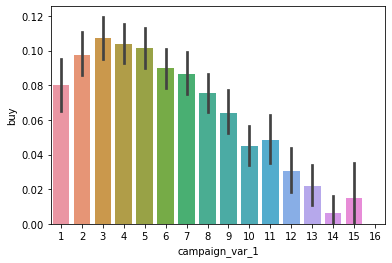

In [81]:
sns.barplot(df['campaign_var_1'],df['buy'])

C:\Users\kavis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign_var_2', ylabel='buy'>

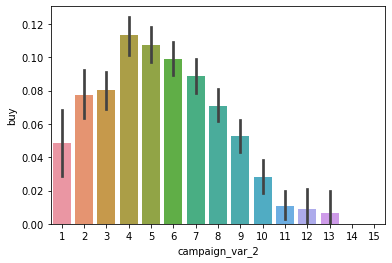

In [82]:
sns.barplot(df['campaign_var_2'],df['buy'])

In [83]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [92]:
df['delay'] = abs(df['created_at']-df['signup_date'])

In [93]:
df['delay'].head()

0     99 days
1    104 days
2    222 days
3   1185 days
4    207 days
Name: delay, dtype: timedelta64[ns]

In [94]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,delay
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,99 days
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,104 days
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,222 days
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1185 days
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,207 days


<AxesSubplot:xlabel='campaign_var_1', ylabel='products_purchased'>

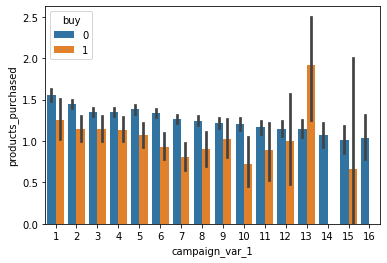

In [98]:
sns.barplot(df['campaign_var_1'], df['products_purchased'], hue = df['buy'])

C:\Users\kavis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign_var_2', ylabel='products_purchased'>

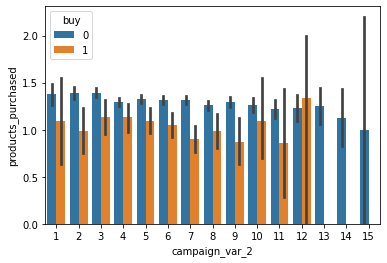

In [99]:
sns.barplot(df['campaign_var_2'], df['products_purchased'], hue = df['buy'])

## BASE MODEL


In [106]:
df.drop(['id', 'created_at', 'signup_date', 'delay'], axis=1, inplace = True)

In [107]:
Y = df['buy']
X = df.drop('buy', axis=1)

In [108]:
X.shape, Y.shape

((24048, 15), (24048,))

In [113]:
Y.value_counts()

0    22075
1     1973
Name: buy, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split as tst
x_trn, x_tst, y_trn, y_tst = tst(X, Y, test_size = 0.25)

In [110]:
from sklearn.linear_model import LogisticRegression
lcr = LogisticRegression()
lcr.fit(x_trn, y_trn)

C:\Users\kavis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
lcr_pred = lcr.predict(x_tst)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_tst, lcr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5515
           1       0.96      0.54      0.69       497

    accuracy                           0.96      6012
   macro avg       0.96      0.77      0.83      6012
weighted avg       0.96      0.96      0.95      6012



In [114]:
test = pd.read_csv('test_Wf7sxXF.csv')
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [117]:
test.isna().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [118]:
test.shape

(13184, 18)

In [ ]:
# test_df = test.drop(test[test['signup_date'].isna()].index) 

In [120]:
mean = test['products_purchased'].mean()
test.fillna(mean, inplace = True)

In [121]:
test_df = test.drop(['id', 'created_at', 'signup_date'], axis =1)

In [122]:
predictions = lcr.predict(test_df)

In [123]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['buy'] = predictions

In [124]:
submission.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [125]:
submission.to_csv('submission.csv', index = False)

In [126]:
sample = pd.read_csv('sample_submission_2zvVjBu.csv')
sample.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [127]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_trn, y_trn)

C:\Users\kavis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
xgb_pred = xgb.predict(x_tst)

In [131]:
print(classification_report(y_tst, xgb_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5515
           1       0.91      0.58      0.71       497

    accuracy                           0.96      6012
   macro avg       0.94      0.79      0.85      6012
weighted avg       0.96      0.96      0.96      6012



In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# k_values = [1, 2, 3, 4, 5, 6, 7]
# for k in k_values:
	# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
	# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = scores.mean()
print('Mean ROC AUC:', score)

Mean ROC AUC: 0.7876318142848203


In [146]:
pipeline.fit(x_trn, y_trn)
pip_pred = pipeline.predict(x_tst)

In [147]:
print(classification_report(y_tst, pip_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5515
           1       0.69      0.58      0.63       497

    accuracy                           0.94      6012
   macro avg       0.83      0.78      0.80      6012
weighted avg       0.94      0.94      0.94      6012



In [148]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(x_trn, y_trn)

RandomForestClassifier()

In [149]:
rdf_pred = rdf.predict(x_tst)

In [150]:
print(classification_report(y_tst, rdf_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5515
           1       0.79      0.58      0.67       497

    accuracy                           0.95      6012
   macro avg       0.88      0.78      0.82      6012
weighted avg       0.95      0.95      0.95      6012



In [156]:
output = xgb.predict(test_df)

In [158]:
output


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
outputs = pd.DataFrame()
outputs['id'] = test['id']
outputs['buy'] = output

In [160]:
outputs.to_csv('outputs.csv', index  = False)

In [176]:
# undersampling = RandomUnderSampler()
x,y = over.fit_resample(X, Y)

In [177]:
x_train, x_val, y_train, y_val = tst(x,y, test_size = 0.20)

In [178]:
xgb.fit(x_train, y_train)

C:\Users\kavis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
pred_xgb = xgb.predict(x_val)

In [180]:
print(classification_report(y_val, pred_xgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4401
           1       0.92      0.56      0.70       456

    accuracy                           0.95      4857
   macro avg       0.94      0.78      0.84      4857
weighted avg       0.95      0.95      0.95      4857



In [201]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# level0.append(('XGB', XGBClassifier()))
# define meta learner model
level1 = SVC()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(x_trn, y_trn)

C:\Users\kavis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kavis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=SVC())

In [202]:
stack_pred = model.predict(x_tst)

In [203]:
print(classification_report(y_tst, stack_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5515
           1       0.96      0.55      0.69       497

    accuracy                           0.96      6012
   macro avg       0.96      0.77      0.84      6012
weighted avg       0.96      0.96      0.96      6012



## Feature Importance

[0.00535052 0.00515145 0.00617726 0.00610444 0.1843671  0.00440738
 0.13925296 0.01650798 0.00459555 0.00523815 0.0312948  0.5106356
 0.02223004 0.04912324 0.00956348]


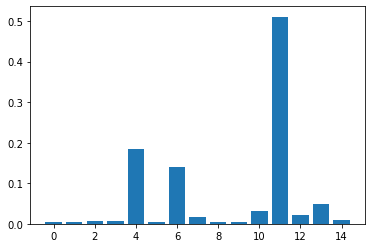

In [207]:
from matplotlib import pyplot
# feature importance
print(xgb.feature_importances_)
# plot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

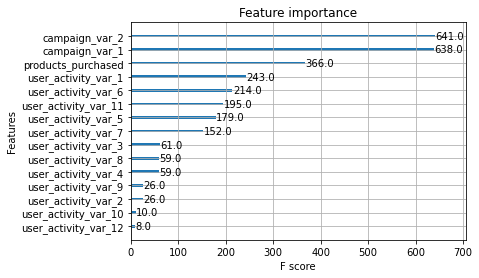

In [209]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb)
pyplot.show()

In [216]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort
accuracy = accuracy_score(y_tst, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_trn)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_trn)
	# eval model
	select_X_test = selection.transform(x_tst)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_tst, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Accuracy: 96.11%
[23:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=15, Accuracy: 96.11%
[23:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.005, n=14, Accuracy: 96.14%
[23:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to resto

In [217]:
X.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

In [244]:
selected_x = X[['campaign_var_1', 'campaign_var_2','products_purchased', 'user_activity_var_1', 'user_activity_var_6', 'user_activity_var_11','user_activity_var_5','user_activity_var_7' ]]

In [245]:
train_x, val_x, train_y, val_y = tst(selected_x, Y, test_size = 0.20)

In [246]:
xgb.fit(train_x, train_y)

[00:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
selected_pred = xgb.predict(val_x)

In [248]:
print(classification_report(val_y, selected_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4428
           1       0.69      0.29      0.41       382

    accuracy                           0.93      4810
   macro avg       0.82      0.64      0.69      4810
weighted avg       0.92      0.93      0.92      4810



## Feature Engineering

In [261]:
X['user_activity'] = (X['user_activity_var_1']+X['user_activity_var_2']+X['user_activity_var_3']+X['user_activity_var_4']+X['user_activity_var_5']+X['user_activity_var_6']+X['user_activity_var_7']+X['user_activity_var_8']+X['user_activity_var_9']+X['user_activity_var_10']+X['user_activity_var_11']+X['user_activity_var_12'])/12

In [278]:
X['camapign_activity'] = (X['campaign_var_1']+X['campaign_var_2'])/2

In [310]:
X['user_products'] = (X['user_activity']*X['products_purchased'])/len(X['user_activity'])

In [311]:
new_x = X[['campaign_var_1', 'campaign_var_2', 'products_purchased','user_activity', 'camapign_activity']]

In [312]:
trn_x, tst_x,trn_y, tst_y = tst(X, Y, test_size=0.20)

In [313]:
xgb.fit(trn_x, trn_y)

[11:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
new_pred = xgb.predict(tst_x)

In [315]:
print(classification_report(tst_y, new_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4434
           1       0.91      0.56      0.70       376

    accuracy                           0.96      4810
   macro avg       0.94      0.78      0.84      4810
weighted avg       0.96      0.96      0.96      4810



In [288]:
test_df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,2,2,0.0,1,1,0,0,0,1,0,0,0,0,1,0
1,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0
2,8,7,0.0,0,0,0,0,1,1,0,0,0,0,0,0
3,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0
4,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0


In [292]:
test_df['user_activity'] = (test_df['user_activity_var_1']+test_df['user_activity_var_2']+test_df['user_activity_var_3']+test_df['user_activity_var_4']+test_df['user_activity_var_5']+test_df['user_activity_var_6']+test_df['user_activity_var_7']+test_df['user_activity_var_8']+test_df['user_activity_var_9']+test_df['user_activity_var_10']+test_df['user_activity_var_11']+test_df['user_activity_var_12'])/12

In [293]:
test_df['campaign_activity'] = (test_df['campaign_var_1']+test_df['campaign_var_2'])/2

In [321]:
test_df['user_products'] = (test_df['user_activity']*test_df['products_purchased'])/len(test_df['user_activity'])

In [294]:
sub = xgb.predict(test_df)

In [295]:
subs = pd.DataFrame()
subs['id'] = test['id']
subs['buy'] = sub

In [296]:
subs.to_csv('subs.csv', index = False)

In [297]:
X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,user_activity,camapign_activity
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0.166667,1.5
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0.250000,1.5
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0.083333,6.0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.5
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0.166667,5.0


## Auto Hyperparameter Tuning

In [324]:
#classes for grid search and cross-validation, function for splitting data and evaluating models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

#XGBoost library
import xgboost as xgb

#Python standard libraries
import time
from copy import deepcopy

In [325]:
%%time

X_train, X_test, y_train, y_test = trn_x, tst_x, trn_y, tst_y
df_test = test_df
#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
test_predictions = clf0.predict(X_test)
# unseen_predictions = clf0.predict(df_test.iloc)

#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
# cfm_unseen = confusion_matrix(df_test, unseen_predictions)

#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
# accs_unseen = accuracy_score(df_test.iloc, unseen_predictions)

#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
# f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
# f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)

#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])
# unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf0.predict_proba(df_test.iloc[:,1:])[:,1])

#best parameters
bp = clf0.best_params_

#storing computed values in results dictionary
results_dict['xgbc0'] = {'iterable_parameter': np.nan,
                         'classifier': deepcopy(clf0),
                         'cv_results': df.copy(),
                         'cfm_train': cfm_train,
                         'cfm_test': cfm_test,
#                          'cfm_unseen': cfm_unseen,
                         'train_accuracy': accs_train,
                         'test_accuracy': accs_test,
#                          'unseen_accuracy': accs_unseen,
                         'train F1-score label 1': f1s_train_p1,
                         'train F1-score label 0': f1s_train_p0,
                         'test F1-score label 1': f1s_test_p1,
                         'test F1-score label 0': f1s_test_p0,
#                          'unseen F1-score label 1': f1s_unseen_p1,
#                          'unseen F1-score label 0': f1s_unseen_p0,
                         'test roc auc score': test_ras,
#                          'unseen roc auc score': unseen_ras,
                         'best_params': bp}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Wall time: 3.34 s


In [326]:
#creating deepcopy of default parameters before manipulations
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [327]:
#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):
    
    #variable for measuring iteration time
    loop_start = time.time()
       
    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value
    
    #classifier instance of current iteration
    xgbc = xgb.XGBClassifier(**default_params)
    
    #GridSearch instance of current iteration
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train.values.ravel())
    
    #results dataframe
    df = pd.DataFrame(clf.cv_results_)
    
    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
#     unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
    #confusion matrices
    cfm_train = confusion_matrix(y_train, train_predictions)
    cfm_test = confusion_matrix(y_test, test_predictions)
#     cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
    #accuracy scores
    accs_train = accuracy_score(y_train, train_predictions)
    accs_test = accuracy_score(y_test, test_predictions)
#     accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
    #F1 scores for each train/test label
    f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
    f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
    f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
    f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
#     f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
#     f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
    #Area Under the Receiver Operating Characteristic Curve
    test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
#     unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
    #best parameters
    bp = clf.best_params_
    
    #storing computed values in results dictionary
    results_dict[f'xgbc{i+1}'] = {'iterable_parameter': grid_key,
                                  'classifier': deepcopy(clf),
                                  'cv_results': df.copy(),
                                  'cfm_train': cfm_train,
                                  'cfm_test': cfm_test,
#                                   'cfm_unseen': cfm_unseen,
                                  'train_accuracy': accs_train,
                                  'test_accuracy': accs_test,
#                                   'unseen_accuracy': accs_unseen,
                                  'train F1-score label 1': f1s_train_p1,
                                  'train F1-score label 0': f1s_train_p0,
                                  'test F1-score label 1': f1s_test_p1,
                                  'test F1-score label 0': f1s_test_p0,
#                                   'unseen F1-score label 1': f1s_unseen_p1,
#                                   'unseen F1-score label 0': f1s_unseen_p0,
                                  'test roc auc score': test_ras,
#                                   'unseen roc auc score': unseen_ras,
                                  'best_params': bp}
    
    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #1 finished in: 25.49180006980896 seconds
Fitting 3 folds for each of 12 candidates, totalling 36 fits
iteration #2 finished in: 21.377805471420288 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
iteration #3 finished in: 29.75741457939148 seconds
Fitting 3 folds for each of 7 candidates, totalling 21 fits
iteration #4 finished in: 11.763529539108276 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #5 finished in: 13.391172885894775 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #6 finished in: 14.751535654067993 seconds


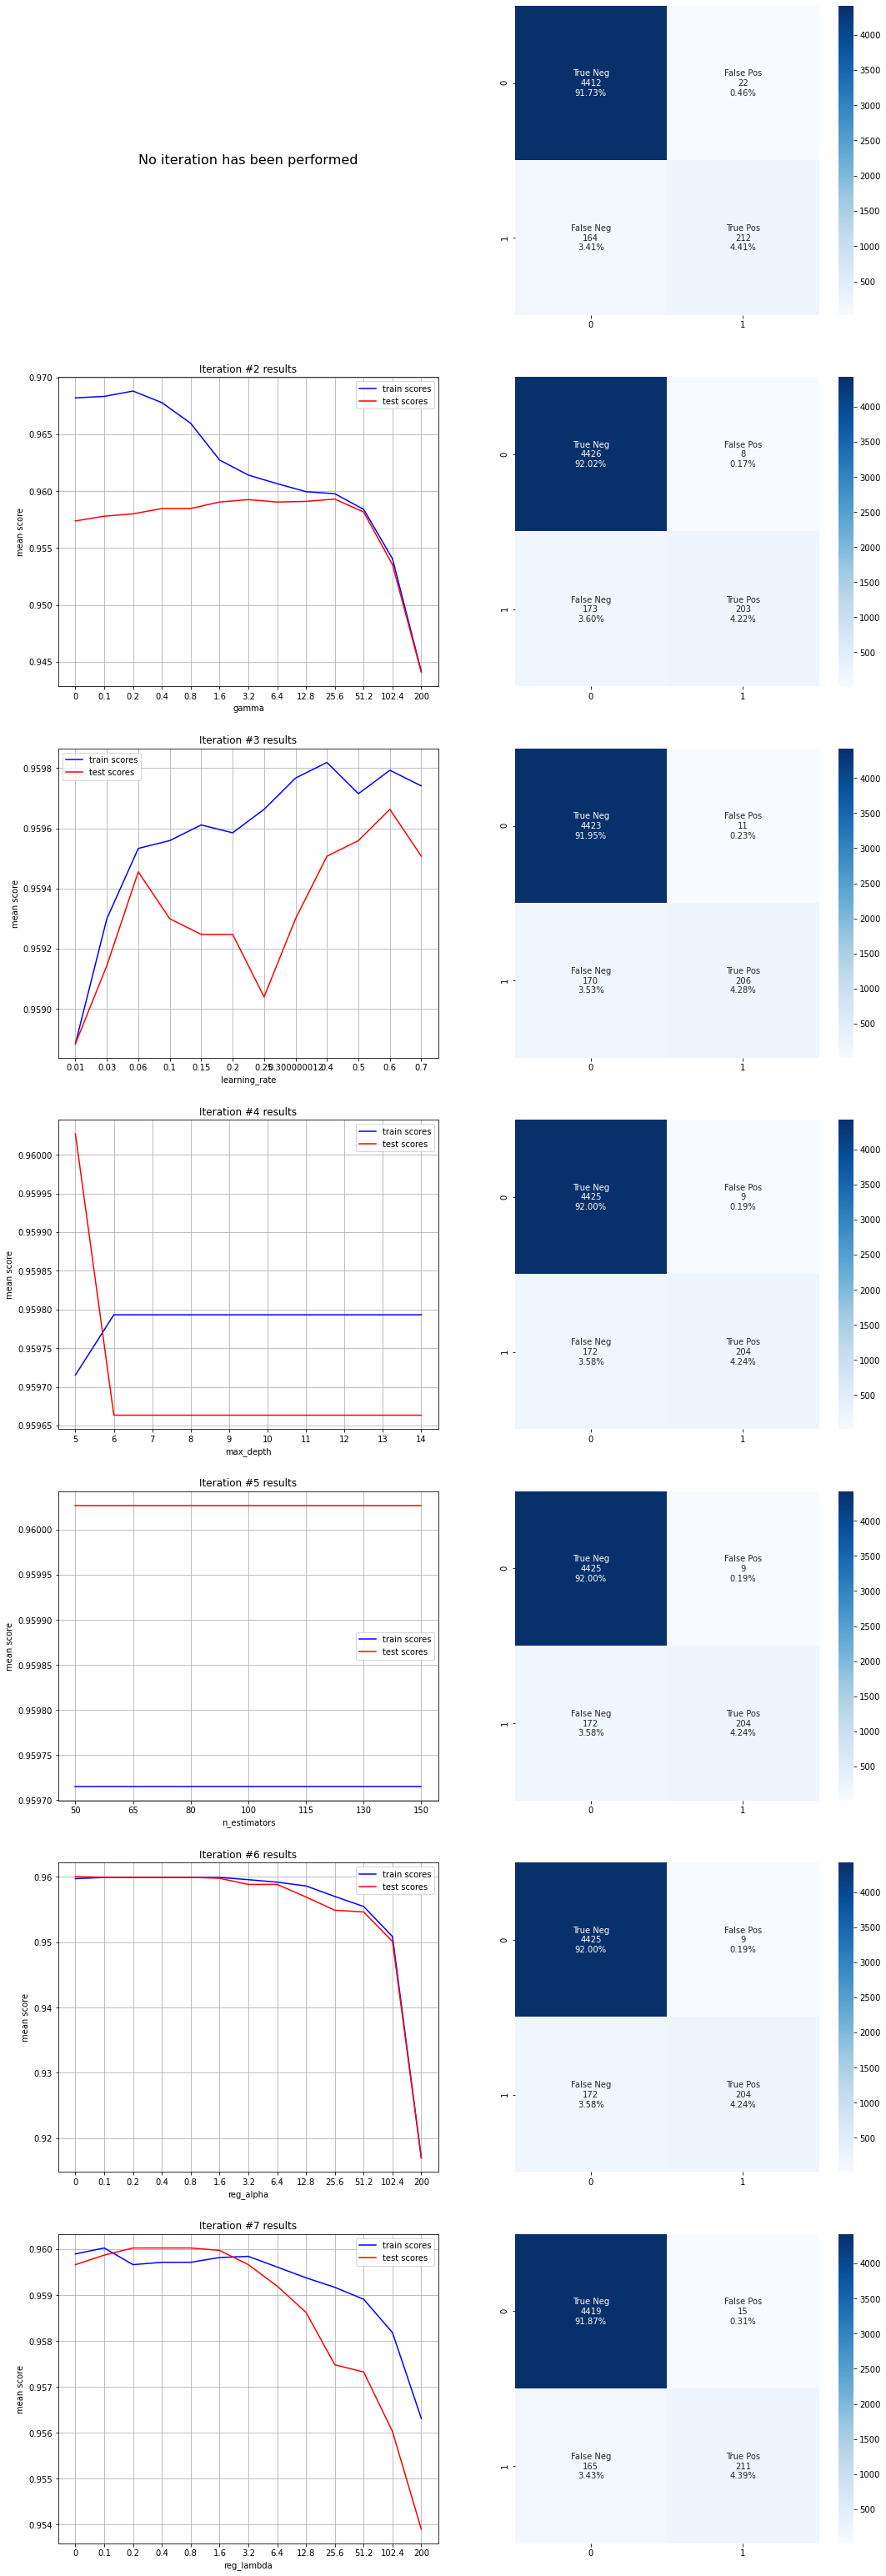

In [328]:
#number of rows depend on number of iterations
nrows = len(results_dict.keys())

#standard group names for confusion matrices
group_names = ['True Neg','False Pos','False Neg','True Pos']

#creating figure
f, axes = plt.subplots(nrows,2,figsize=(18,8*nrows));

#iteratively plotting train/test accuracy scores and test confusion matrix
for i,ax in enumerate(axes):
    
    #current key of results dictionary
    ckey = list(results_dict.keys())[i] 
    
    #plotting scores for models other than the benchark model
    if ckey != 'xgbc0':
        x1 = results_dict[ckey]['cv_results'].loc[:,'mean_train_score']
        x2 = results_dict[ckey]['cv_results'].loc[:,'mean_test_score']
        
        ax[0].plot(x1, label='train scores', color='blue');
        ax[0].plot(x2, label='test scores', color='red');
        ax[0].set_title(f'Iteration #{i+1} results');
               
        ax[0].set_xticks(list(range(0,len([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]))));
        ax[0].set_xticklabels(sorted([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]));
    
        ax[0].grid('major');
        ax[0].legend();
        ax[0].set_xlabel(results_dict[ckey]['iterable_parameter'])
        ax[0].set_ylabel('mean score');
    
    #leaving scores plot blank for benchmark model
    else:
        ax[0].axis('off')
        ax[0].text(x=0.5, y=0.5, s='No iteration has been performed', fontsize=16, va='center', ha='center')
    
    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()/np.sum(results_dict[ckey]['cfm_test'])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    #plotting confusion matrix
    sns.heatmap(results_dict[ckey]['cfm_test'], annot=labels, fmt='', cmap='Blues', ax=ax[1])
    
plt.show();

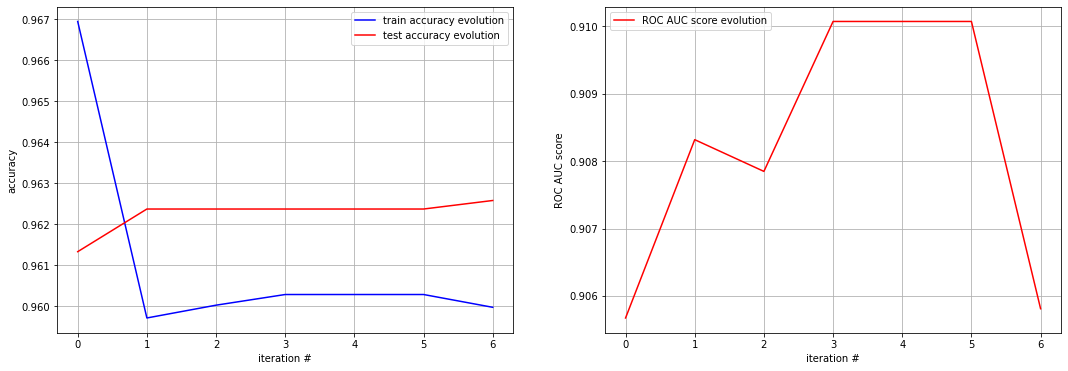

In [329]:
f, axes = plt.subplots(1,2,figsize=(18,6));

#plotting evolution of train/test accuracy scores for subsequent iterations
axes[0].plot([results_dict[key]['train_accuracy'] for key in results_dict.keys()], label='train accuracy evolution', color='blue');
axes[0].plot([results_dict[key]['test_accuracy'] for key in results_dict.keys()], label='test accuracy evolution', color='red');

#setting labels, drawing legend and major grid
axes[0].set_xlabel('iteration #');
axes[0].set_ylabel('accuracy');
axes[0].legend();
axes[0].grid('major');

#plotting evolution of test ROC AUC scores for subsequent iterations
axes[1].plot([results_dict[key]['test roc auc score'] for key in results_dict.keys()], label='ROC AUC score evolution', color='red');

#setting labels, drawing legend and major grid
axes[1].set_xlabel('iteration #');
axes[1].set_ylabel('ROC AUC score');
axes[1].legend();
axes[1].grid('major');

plt.show();

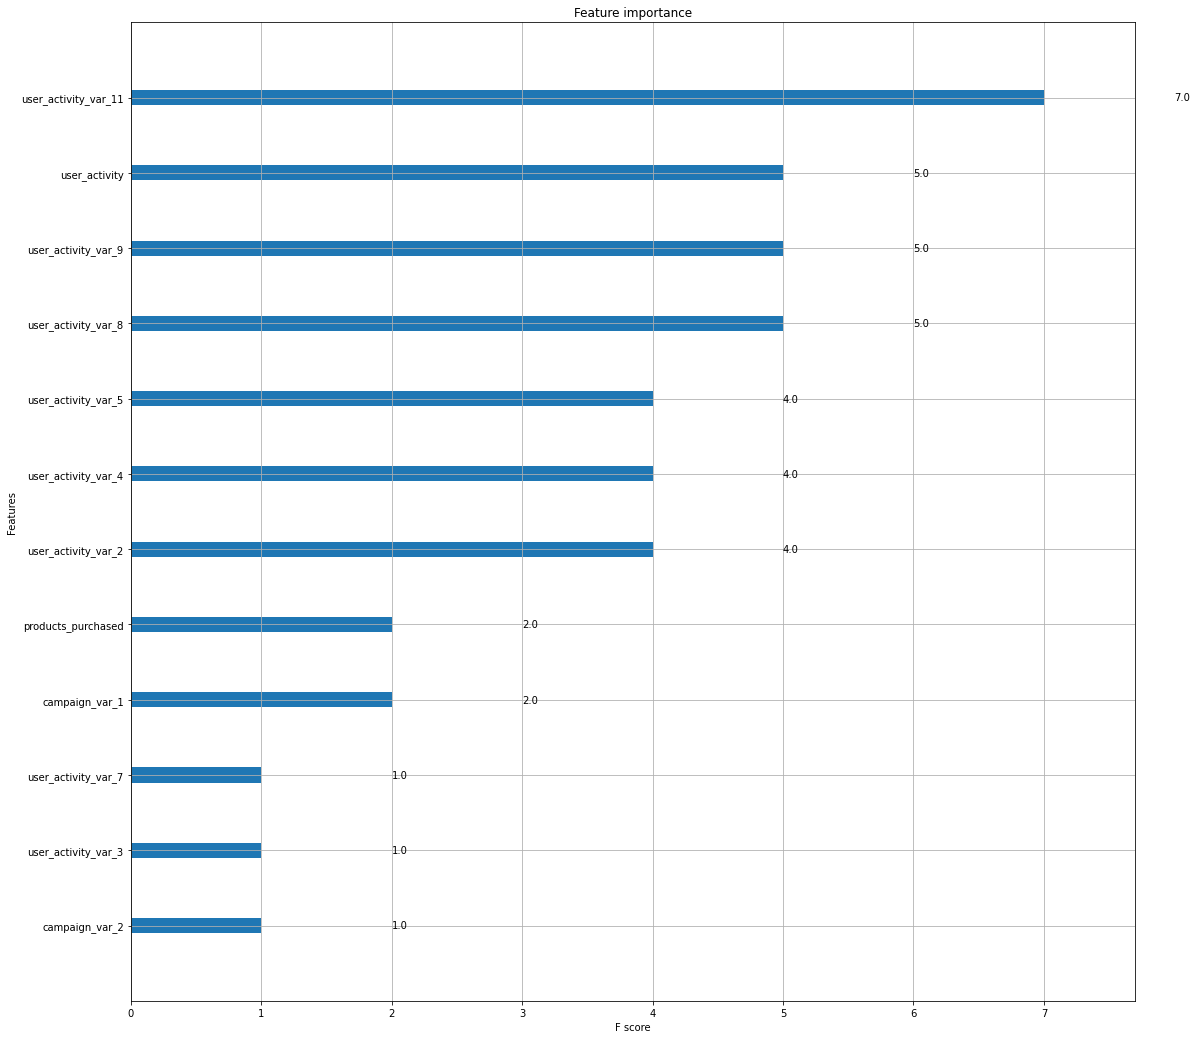

In [330]:
#plotting feature importance
f, ax = plt.subplots(figsize=(18,18));
xgb.plot_importance(clf.best_estimator_, ax=ax);

### Randomised Search

In [331]:
%%time

#start time
t0 = time.time()

#No. of jobs
rcvj = gcvj

#unwrapping list values of default parameters
default_params_xgb = {}

for key in default_params.keys():
    default_params_xgb[key] = default_params[key][0]

#providing default parameters to xgbc model, before randomized search cross-validation
xgbc = xgb.XGBClassifier(**default_params_xgb)

#Executing Randomized Search
clf = RandomizedSearchCV(estimator=xgbc, param_distributions=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3, n_iter=rcvj)
clf.fit(X_train, y_train.values.ravel())
    
#results dataframe
df = pd.DataFrame(clf.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
# unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
# cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
# accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
# f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
# f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
#best parameters
bp = clf.best_params_
    
#storing computed values in results dictionary
results_dict['xgbc_rcv'] = {'classifier': deepcopy(clf),
                            'cv_results': df.copy(),
                            'cfm_train': cfm_train,
                            'cfm_test': cfm_test,
#                             'cfm_unseen': cfm_unseen,
                            'train_accuracy': accs_train,
                            'test_accuracy': accs_test,
#                             'unseen_accuracy': accs_unseen,
                            'train F1-score label 1': f1s_train_p1,
                            'train F1-score label 0': f1s_train_p0,
                            'test F1-score label 1': f1s_test_p1,
                            'test F1-score label 0': f1s_test_p0,
#                             'unseen F1-score label 1': f1s_unseen_p1,
#                             'unseen F1-score label 0': f1s_unseen_p0,
                            'test roc auc score': test_ras,
#                             'unseen roc auc score': unseen_ras,
                            'best_params': bp}

#stop time
t1 = time.time()

#elapsed time
rcvt = t1 - t0

Fitting 3 folds for each of 68 candidates, totalling 204 fits
Wall time: 2min 46s


In [332]:
%%time

#start time
t0 = time.time()

#No. of jobs
bcvj = int(gcvj)

#unwrapping list values of default parameters
default_params_xgb = {}

for key in default_params.keys():
    default_params_xgb[key] = default_params[key][0]

#providing default parameters to xgbc model, before randomized search cross-validation
xgbc = xgb.XGBClassifier(**default_params_xgb)

clf = BayesSearchCV(estimator=xgbc, search_spaces=param_grid, n_iter=bcvj, scoring='accuracy', cv=3, return_train_score=True, verbose=3)
clf.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
# unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
# cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
# accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
# f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
# f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
#best parameters
bp = clf.best_params_
    
#storing computed values in results dictionary
results_dict['xgbc_bcv'] = {'classifier': deepcopy(clf),
                            'cv_results': df.copy(),
                            'cfm_train': cfm_train,
                            'cfm_test': cfm_test,
#                             'cfm_unseen': cfm_unseen,
                            'train_accuracy': accs_train,
                            'test_accuracy': accs_test,
#                             'unseen_accuracy': accs_unseen,
                            'train F1-score label 1': f1s_train_p1,
                            'train F1-score label 0': f1s_train_p0,
                            'test F1-score label 1': f1s_test_p1,
                            'test F1-score label 0': f1s_test_p0,
#                             'unseen F1-score label 1': f1s_unseen_p1,
#                             'unseen F1-score label 0': f1s_unseen_p0,
                            'test roc auc score': test_ras,
#                             'unseen roc auc score': unseen_ras,
                            'best_params': bp}

#stop time
t1 = time.time()

#elapsed time
bcvt = t1 - t0

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=3.2, learning_rate=0.4, max_depth=6, n_estimators=100, reg_alpha=0.2, reg_lambda=1.6;, score=(train=0.961, test=0.961) total time=   0.5s
[CV 2/3] END gamma=3.2, learning_rate=0.4, max_depth=6, n_estimators=100, reg_alpha=0.2, reg_lambda=1.6;, score=(train=0.963, test=0.954) total time=   0.8s
[CV 3/3] END gamma=3.2, learning_rate=0.4, max_depth=6, n_estimators=100, reg_alpha=0.2, reg_lambda=1.6;, score=(train=0.961, test=0.961) total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=102.4, learning_rate=0.4, max_depth=12, n_estimators=80, reg_alpha=102.4, reg_lambda=51.2;, score=(train=0.917, test=0.917) total time=   0.6s
[CV 2/3] END gamma=102.4, learning_rate=0.4, max_depth=12, n_estimators=80, reg_alpha=102.4, reg_lambda=51.2;, score=(train=0.917, test=0.917) total time=   0.6s
[CV 3/3] END gamma=102.4, learning_rate=0.4, max_depth=12, n_estimators=80, reg_alpha=1

[CV 2/3] END gamma=12.8, learning_rate=0.25, max_depth=10, n_estimators=65, reg_alpha=25.6, reg_lambda=0.8;, score=(train=0.961, test=0.956) total time=   0.6s
[CV 3/3] END gamma=12.8, learning_rate=0.25, max_depth=10, n_estimators=65, reg_alpha=25.6, reg_lambda=0.8;, score=(train=0.958, test=0.962) total time=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=200.0, learning_rate=0.1, max_depth=11, n_estimators=80, reg_alpha=0.1, reg_lambda=3.2;, score=(train=0.936, test=0.936) total time=   0.9s
[CV 2/3] END gamma=200.0, learning_rate=0.1, max_depth=11, n_estimators=80, reg_alpha=0.1, reg_lambda=3.2;, score=(train=0.939, test=0.937) total time=   1.0s
[CV 3/3] END gamma=200.0, learning_rate=0.1, max_depth=11, n_estimators=80, reg_alpha=0.1, reg_lambda=3.2;, score=(train=0.936, test=0.937) total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=102.4, learning_rate=0.25, max_depth=6, n_estimators=50, reg_alpha

[CV 3/3] END gamma=1.6, learning_rate=0.03, max_depth=5, n_estimators=65, reg_alpha=0.2, reg_lambda=0.4;, score=(train=0.959, test=0.961) total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.959, test=0.960) total time=   1.2s
[CV 2/3] END gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.962, test=0.956) total time=   1.3s
[CV 3/3] END gamma=12.8, learning_rate=0.06, max_depth=12, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.959, test=0.962) total time=   1.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=1.6, learning_rate=0.300000012, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=12.8;, score=(train=0.961, test=0.961) total time=   0.8s
[CV 2/3] END gamma=1.6, learning_rate=0.300000012, max_depth=10, n_estimators=

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=12.8, reg_lambda=0.4;, score=(train=0.960, test=0.960) total time=   0.4s
[CV 2/3] END gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=12.8, reg_lambda=0.4;, score=(train=0.963, test=0.954) total time=   0.3s
[CV 3/3] END gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=150, reg_alpha=12.8, reg_lambda=0.4;, score=(train=0.959, test=0.961) total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=3.2, learning_rate=0.1, max_depth=5, n_estimators=80, reg_alpha=0.1, reg_lambda=12.8;, score=(train=0.960, test=0.960) total time=   0.3s
[CV 2/3] END gamma=3.2, learning_rate=0.1, max_depth=5, n_estimators=80, reg_alpha=0.1, reg_lambda=12.8;, score=(train=0.962, test=0.955) total time=   0.3s
[CV 3/3] END gamma=3.2, learning_rate=0.1, max_depth=5, n_estimators=80, reg_alpha=0.1, reg

[CV 2/3] END gamma=0.4, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.8, reg_lambda=12.8;, score=(train=0.961, test=0.956) total time=   0.1s
[CV 3/3] END gamma=0.4, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0.8, reg_lambda=12.8;, score=(train=0.958, test=0.961) total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=0.1, learning_rate=0.06, max_depth=10, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6;, score=(train=0.961, test=0.961) total time=   0.6s
[CV 2/3] END gamma=0.1, learning_rate=0.06, max_depth=10, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6;, score=(train=0.964, test=0.954) total time=   0.7s
[CV 3/3] END gamma=0.1, learning_rate=0.06, max_depth=10, n_estimators=115, reg_alpha=0.0, reg_lambda=25.6;, score=(train=0.961, test=0.962) total time=   1.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END gamma=1.6, learning_rate=0.300000012, max_depth=11, n_estimators=115, reg

## model comarisonn

In [333]:
#printing benchmark, iterative grid search and randomized search ROC AUC / accuracy scores (test data set)
print(f"Benchmark AUC/accuracy score: {np.round(results_dict['xgbc0']['test roc auc score'],4)} / {np.round(results_dict['xgbc0']['test_accuracy'],4)}")
print(f"Coordinate descent AUC/accuracy score: {np.round(results_dict['xgbc3']['test roc auc score'],4)} / {np.round(results_dict['xgbc3']['test_accuracy'],4)} @ {np.round(gcvt/60,2)} minutes and {gcvj} jobs")
print(f"Randomized search AUC/accuracy score: {np.round(results_dict['xgbc_rcv']['test roc auc score'],4)} / {np.round(results_dict['xgbc_rcv']['test_accuracy'],4)} @ {np.round(rcvt/60,2)} minutes and {rcvj} jobs")
print(f"Bayes search AUC/accuracy score: {np.round(results_dict['xgbc_bcv']['test roc auc score'],4)} / {np.round(results_dict['xgbc_bcv']['test_accuracy'],4)} @ {np.round(bcvt/60,2)} minutes and {bcvj} jobs")
print("")

#computing expected time of executing exhaustive grid search
jobs = np.cumprod([len(x) for x in param_grid])[-1]
et = jobs * gcvt / gcvj
print(f"Expected time of executing exhaustive grid search with 3-fold cross-validation: {int(et/60)} minutes and {jobs} jobs")

Benchmark AUC/accuracy score: 0.9057 / 0.9613
Coordinate descent AUC/accuracy score: 0.9101 / 0.9624 @ 1.94 minutes and 68 jobs
Randomized search AUC/accuracy score: 0.9135 / 0.9622 @ 2.78 minutes and 68 jobs
Bayes search AUC/accuracy score: 0.9141 / 0.9622 @ 6.88 minutes and 68 jobs

Expected time of executing exhaustive grid search with 3-fold cross-validation: 18046 minutes and 631800 jobs


In [335]:
# #printing benchmark, iterative grid search and randomized search ROC AUC / accuracy scores (unseen data set)
# print(f"Benchmark AUC/accuracy score: {np.round(results_dict['xgbc0']['unseen roc auc score'],4)} / {np.round(results_dict['xgbc0']['unseen_accuracy'],4)}")
# print(f"Coordinate descent AUC/accuracy score: {np.round(results_dict['xgbc3']['unseen roc auc score'],4)} / {np.round(results_dict['xgbc3']['unseen_accuracy'],4)}")
# print(f"Randomized search AUC/accuracy score: {np.round(results_dict['xgbc_rcv']['unseen roc auc score'],4)} / {np.round(results_dict['xgbc_rcv']['unseen_accuracy'],4)}")
# print(f"Bayes search AUC/accuracy score: {np.round(results_dict['xgbc_bcv']['unseen roc auc score'],4)} / {np.round(results_dict['xgbc_bcv']['unseen_accuracy'],4)}")

In [ ]:
# #set keys for extracting confusion matrices (unseen data set)
# keys = ['xgbc0', 'xgbc3', 'xgbc_rcv', 'xgbc_bcv']
# titles = ['Benchmark model', 'Coordinate Descent', 'Randomized Search', 'Bayesian Search']

# f, axes = plt.subplots(2,2,figsize=(18,14));

# for i,ax in enumerate(axes.flatten()):
    
#     #computing variables for specific confusion matrix
#     group_counts = ["{0:0.0f}".format(value) for value in results_dict[keys[i]]['cfm_unseen'].flatten()]
#     group_percentages = ["{0:.2%}".format(value) for value in results_dict[keys[i]]['cfm_unseen'].flatten()/np.sum(results_dict[keys[i]]['cfm_unseen'])]
#     labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
    
#     #plotting confusion matrix
#     sns.heatmap(results_dict[keys[i]]['cfm_unseen'], annot=labels, fmt='', cmap='Blues', ax=ax)
#     ax.set_title(f"Confusion matrix for {titles[i]}")

In [336]:
df_bestparams = pd.DataFrame([{key: clf0.best_params_[key] for key in param_grid.keys()},
                              {key: results_dict['xgbc3']['classifier'].best_params_[key] for key in param_grid.keys()},
                              {key: results_dict['xgbc_rcv']['classifier'].best_params_[key] for key in param_grid.keys()},
                              {key: results_dict['xgbc_bcv']['classifier'].best_params_[key] for key in param_grid.keys()}],
                              index=['Benchmark', 'GridSearchCV (CD)', 'RandomizedSearchCV', 'BayesSearchCV'])
df_bestparams

,gamma,learning_rate,max_depth,n_estimators,reg_alpha,reg_lambda
Benchmark,0.0,0.3,6,100,0.0,1.0
GridSearchCV (CD),25.6,0.6,5,100,0.0,1.0
RandomizedSearchCV,3.2,0.1,14,65,12.8,6.4
BayesSearchCV,3.2,0.3,13,80,12.8,6.4


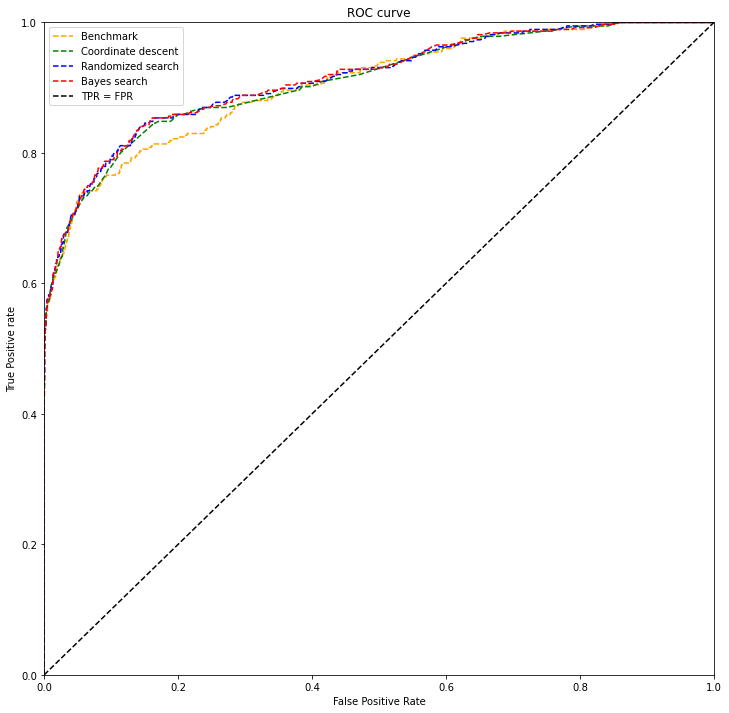

In [337]:
# roc curve for models
fpr_bm, tpr_bm, thresh_bm = roc_curve(y_test, clf0.predict_proba(X_test)[:,1], pos_label=1)
fpr_cd, tpr_cd, thresh_cd = roc_curve(y_test, results_dict['xgbc3']['classifier'].predict_proba(X_test)[:,1], pos_label=1)
fpr_rcv, tpr_rcv, thresh_rcv = roc_curve(y_test, results_dict['xgbc_rcv']['classifier'].predict_proba(X_test)[:,1], pos_label=1)
fpr_bcv, tpr_bcv, thresh_bcv = roc_curve(y_test, results_dict['xgbc_bcv']['classifier'].predict_proba(X_test)[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#plotting roc curves
plt.figure(figsize=(12,12));
plt.plot(fpr_bm, tpr_bm, linestyle='--',color='orange', label='Benchmark');
plt.plot(fpr_cd, tpr_cd, linestyle='--',color='green', label='Coordinate descent');
plt.plot(fpr_rcv, tpr_rcv, linestyle='--',color='blue', label='Randomized search');
plt.plot(fpr_bcv, tpr_bcv, linestyle='--',color='red', label='Bayes search');
plt.plot(p_fpr, p_tpr, linestyle='--',color='black', label='TPR = FPR')

plt.xlim((0,1));
plt.ylim((0,1));

plt.title('ROC curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive rate');

plt.legend(loc='best');
plt.show();

In [351]:
bench_pred = clf0.predict(tst_x)
print(classification_report(tst_y, bench_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4434
           1       0.91      0.56      0.70       376

    accuracy                           0.96      4810
   macro avg       0.94      0.78      0.84      4810
weighted avg       0.96      0.96      0.96      4810



In [348]:
grid_pred = results_dict['xgbc3']['classifier'].predict(tst_x)
print(classification_report(tst_y, grid_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4434
           1       0.96      0.54      0.69       376

    accuracy                           0.96      4810
   macro avg       0.96      0.77      0.84      4810
weighted avg       0.96      0.96      0.96      4810



In [349]:
rcv_pred = results_dict['xgbc_rcv']['classifier'].predict(tst_x)
print(classification_report(tst_y, rcv_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4434
           1       0.94      0.55      0.69       376

    accuracy                           0.96      4810
   macro avg       0.95      0.77      0.84      4810
weighted avg       0.96      0.96      0.96      4810



In [350]:
bcv_pred = results_dict['xgbc_bcv']['classifier'].predict(tst_x)
print(classification_report(tst_y, bcv_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4434
           1       0.94      0.55      0.69       376

    accuracy                           0.96      4810
   macro avg       0.95      0.77      0.84      4810
weighted avg       0.96      0.96      0.96      4810



## Neglecting the Assumption

In [353]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35292 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35292 non-null  int64  
 1   created_at            35292 non-null  object 
 2   campaign_var_1        35292 non-null  int64  
 3   campaign_var_2        35292 non-null  int64  
 4   products_purchased    14398 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   35292 non-null  int64  
 7   user_activity_var_2   35292 non-null  int64  
 8   user_activity_var_3   35292 non-null  int64  
 9   user_activity_var_4   35292 non-null  int64  
 10  user_activity_var_5   35292 non-null  int64  
 11  user_activity_var_6   35292 non-null  int64  
 12  user_activity_var_7   35292 non-null  int64  
 13  user_activity_var_8   35292 non-null  int64  
 14  user_activity_var_9   35292 non-null  int64  
 15  user_activity_var_1

In [355]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,35292.000000,35292.000000,35292.000000,14398.000000,35292.000000,35292.000000,35292.000000,35292.000000,35292.000000,35292.00000,35292.000000,35292.000000,35292.000000,35292.000000,35292.000000,35292.000000,35292.000000
mean,19495.893432,6.504987,6.407344,2.152452,0.400346,0.007282,0.102686,0.012524,0.152697,0.50527,0.287856,0.169103,0.012552,0.000425,0.221353,0.000595,0.055905
std,11323.567304,3.474108,2.608676,0.782189,0.509981,0.085025,0.303553,0.111210,0.360959,0.56007,0.456447,0.375000,0.111334,0.020612,0.434963,0.024386,0.229741
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9670.750000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19449.500000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29286.250000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.00000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [356]:
train.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20894
signup_date             11244
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [358]:
train_df.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [608]:
train_set = train_df.copy()

In [609]:
train_set.fillna(0, inplace = True)

In [610]:
if train_set['products_purchased'].any==0 and train_set['buy'].any==1:
    train_set['products_purchased'].any = train_set['products_purchased'].median()

In [611]:
y = train_set['buy']
X  = train_set.drop(['created_at', 'id','signup_date','buy'], axis=1)

In [612]:
X.shape

(39161, 15)

In [365]:
X_train, X_val, y_train, y_val = tst(X,y, test_size=0.2, stratify=y)

In [371]:
xgb = xgb.XGBClassifier().fit(X_train, y_train)

[13:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [372]:
y_prd = xgb.predict(X_val)

In [373]:
print(classification_report(y_val, y_prd))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.95      0.52      0.67       400

    accuracy                           0.97      7833
   macro avg       0.96      0.76      0.83      7833
weighted avg       0.97      0.97      0.97      7833



In [374]:
X_test = test.copy()

In [375]:
X_test.fillna(0, inplace = True)

In [376]:
if X_test['products_purchased'].any==0:
    X_test['products_purchased'].any = X_test['products_purchased'].median()
    

In [378]:
X_test.drop(['id','created_at','signup_date'], axis=1, inplace= True)

In [379]:
test_pred = xgb.predict(X_test)

In [380]:
result = pd.DataFrame()
result['id'] = test['id']
result['buy'] = test_pred

In [381]:
result.to_csv('resilts.csv', index = False)

## oversampling

In [393]:
y = train_set['buy']

In [567]:
# oversampling = SMOTE(0.5)
# define pipeline
over = SMOTE(sampling_strategy=0.25)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
# X, y = pipeline.fit_resample(X, y)
X_oversamples,y_oversampled = pipeline.fit_resample(X,y)

In [568]:
y_oversampled.value_counts()

0    18580
1     9290
Name: buy, dtype: int64

In [569]:
X_train, X_val, y_train, y_val = tst(X_oversamples,y_oversampled, test_size=0.2,stratify=y_oversampled)

In [570]:
xgb.fit(X_train, y_train)

[13:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [571]:
y_pred = xgb.predict(X_val)

In [572]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3716
           1       0.84      0.71      0.77      1858

    accuracy                           0.86      5574
   macro avg       0.85      0.82      0.83      5574
weighted avg       0.86      0.86      0.85      5574



In [457]:
pred_test = xgb.predict(X_test)

In [388]:
predictions = pd.DataFrame()
predictions['id'] = test['id']
predictions['buy'] = pred_test

In [389]:
predictions.to_csv('predictions.csv', index = False)

<AxesSubplot:xlabel='campaign_var_1', ylabel='products_purchased'>

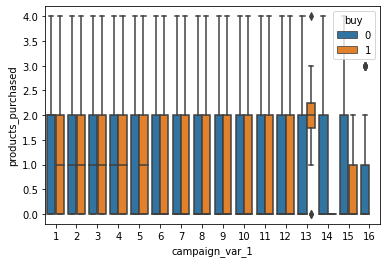

In [575]:
sns.boxplot(train_set['campaign_var_1'], train_set['products_purchased'], hue = train_set['buy'])

In [581]:
len(train_set[train_set['products_purchased']>3.0])

716

In [582]:
len(train_set[train_set['products_purchased']==0])

20911

In [583]:
train_set['buy'][train_set['products_purchased']==0].value_counts()

0    19866
1     1045
Name: buy, dtype: int64

In [613]:
for i in range(len(train_set['products_purchased'])):
    if train_set['products_purchased'][i]==0 and train_set['buy'][i]==1:
        train_set['products_purchased'][i]=train_set['products_purchased'].median()

In [614]:
y = train_set['buy']
X  = train_set.drop(['created_at', 'id','signup_date','buy'], axis=1)

In [587]:
X.shape

X_train, X_val, y_train, y_val = tst(X,y, test_size=0.2, stratify=y)

xgb.fit(X_train, y_train)

y_prd = xgb.predict(X_val)

print(classification_report(y_val, y_prd))

[14:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.92      0.58      0.71       400

    accuracy                           0.98      7833
   macro avg       0.95      0.79      0.85      7833
weighted avg       0.97      0.98      0.97      7833



### Try increasing Recall

In [592]:
from xgboost import cv
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [593]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.823839,0.002948,0.823859,0.005916
1,0.847362,0.014272,0.852293,0.025486
2,0.865146,0.004169,0.867326,0.018359
3,0.866618,0.002039,0.868776,0.016155
4,0.870410,0.008680,0.872254,0.008486


In [588]:
y_test = xgb.predict(X_test)

In [589]:
result = pd.DataFrame()
result['id']= test['id']
result['buy']= y_test

In [590]:
result.to_csv('result.csv', index= False)

In [594]:
train_set['campaign_var_1'].value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

In [599]:
cats = ['campaign_var_1', 'campaign_var_2', 'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12']

In [643]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# for cat in cats:
#     X[cat]=enc.fit_transform(X[cat])

In [604]:
X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,0,1,2.0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,0,2.0,1,0,1,0,0,0,1,0,0,0,0,0
2,1,1,3.0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0.0,0,0,0,0,0,0,1,0,0,0,1,0


In [605]:
X['campaign_var_1'].value_counts()

1    37568
0     1593
Name: campaign_var_1, dtype: int64

In [607]:
X.shape

X_train, X_val, y_train, y_val = tst(X,y, test_size=0.2, stratify=y)
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

y_prd = xgb.predict(X_val)

print(classification_report(y_val, y_prd))

[14:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7433
           1       0.94      0.44      0.60       400

    accuracy                           0.97      7833
   macro avg       0.95      0.72      0.79      7833
weighted avg       0.97      0.97      0.96      7833



In [618]:
print(confusion_matrix(y_val, y_prd))

[[7421   12]
 [ 224  176]]


In [619]:
recall = pd.DataFrame()
recall['y_val'] = y_val
recall['y_prd'] = y_prd

In [620]:
recall

,y_val,y_prd
12892,0,0
105,0,0
37027,0,0
22884,0,0
11472,0,0
...,...,...
16452,0,0
28265,0,0
21879,0,0
34866,0,0


In [633]:
one = recall[recall['y_val']==1]

In [635]:
one_zero = one[one['y_prd']==0]

In [636]:
X.iloc[one_zero.index]

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
15946,6,5,1.0,0,0,1,0,1,1,1,0,0,0,0,0
33083,4,5,1.0,1,0,0,0,1,1,1,0,0,0,0,0
27169,8,7,3.0,2,0,0,0,1,0,0,0,0,0,3,0
28669,4,4,3.0,1,0,0,0,1,0,0,0,0,0,1,0
27336,7,4,0.0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,4,8,0.0,1,0,0,0,0,0,0,0,0,0,0,0
23982,9,9,0.0,1,0,0,0,0,1,1,0,0,0,0,0
3050,6,7,0.0,0,0,0,0,1,0,1,0,0,0,1,0
26227,6,7,1.0,2,0,0,0,1,0,0,0,0,0,1,0


In [639]:
train_set.iloc[one_zero.index].head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
15946,15947,2021-07-25,6,5,1.0,2020-03-12,0,0,1,0,1,1,1,0,0,0,0,0,1
33083,33084,2021-11-23,4,5,1.0,2019-04-02,1,0,0,0,1,1,1,0,0,0,0,0,1
27169,27170,2021-10-16,8,7,3.0,2019-05-25,2,0,0,0,1,0,0,0,0,0,3,0,1
28669,28670,2021-10-25,4,4,3.0,2020-03-16,1,0,0,0,1,0,0,0,0,0,1,0,1
27336,27337,2021-10-17,7,4,0.0,2021-07-30,0,0,0,0,0,0,0,0,0,0,1,0,1


In [640]:
one_one = one[one['y_prd']==1]

In [642]:
train_set.iloc[one_one.index].head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
17239,17240,2021-08-05,5,4,0.0,2018-11-25,0,0,0,1,0,0,0,0,0,0,0,0,1
5982,5983,2021-04-17,3,5,4.0,2018-11-15,0,0,0,0,1,0,0,0,1,0,2,0,1
32059,32060,2021-11-17,4,5,3.0,2021-07-20,1,0,0,1,0,0,1,0,1,0,0,0,1
13439,13440,2021-07-03,7,7,0.0,2019-11-17,0,0,0,1,0,0,0,0,0,0,1,0,1
21084,21085,2021-09-03,8,4,0.0,2021-06-23,0,0,0,1,1,1,0,0,1,0,0,0,1


In [644]:
probs = xgb.predict_proba(X_val)

<AxesSubplot:ylabel='Density'>

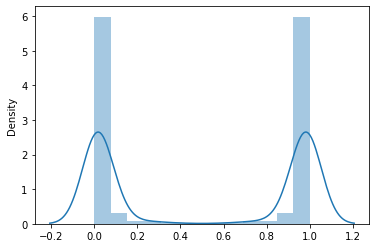

In [648]:
sns.distplot(probs)

In [649]:
y.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [715]:
model = XGBClassifier(scale_pos_weight=1.14)

In [716]:
model.fit(X_train, y_train)

[22:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.14, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [717]:
weigh_pred = model.predict(X_val)

In [718]:
print(classification_report(y_val, weigh_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7433
           1       0.93      0.44      0.60       400

    accuracy                           0.97      7833
   macro avg       0.95      0.72      0.79      7833
weighted avg       0.97      0.97      0.96      7833



In [702]:
# define grid
weights = [1,1.1,1.15,1.2,1.25,1.3,1.35,1.4, 1.41, 1.42, 1.43, 1.44,1.45,1.46,1.47,1.48,1.49,1.5]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
# define model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[22:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.912197 using {'scale_pos_weight': 1.15}
0.911406 (0.009591) with: {'scale_pos_weight': 1}
0.911823 (0.009368) with: {'scale_pos_weight': 1.1}
0.912197 (0.009980) with: {'scale_pos_weight': 1.15}
0.911493 (0.009373) with: {'scale_pos_weight': 1.2}
0.911681 (0.010056) with: {'scale_pos_weight': 1.25}
0.912124 (0.009962) with: {'scale_pos_weight': 1.3}
0.911930 (0.009437) with: {'scale_pos_weight': 1.35}
0.911215 (0.009499) with: {'scale_pos_weight': 1.4}
0.910962 (0.009164) with: {'scale_pos_weight': 1.41}
0.911019 (0.009800) with: {'scale_pos_weight': 1.42}
0.911381 (0.009120) with: {'scale_pos_weight': 1.43}
0.911844 (0.009622) with: {'scale_pos_weight': 1.44}
0.911586 (0.0

In [719]:
recall_study = pd.DataFrame()
recall_study['y_val'] = y_val
recall_study['y_pred'] = weigh_pred

In [720]:
one = recall_study[recall_study['y_val']==1]

In [721]:
one_zero = one[one['y_pred']==0]

In [722]:
one_one = one[one['y_pred']==1]

In [725]:
X.iloc[one_zero.index].head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
15946,6,5,1.0,0,0,1,0,1,1,1,0,0,0,0,0
33083,4,5,1.0,1,0,0,0,1,1,1,0,0,0,0,0
27169,8,7,3.0,2,0,0,0,1,0,0,0,0,0,3,0
28669,4,4,3.0,1,0,0,0,1,0,0,0,0,0,1,0
27336,7,4,0.0,0,0,0,0,0,0,0,0,0,0,1,0


In [726]:
X.iloc[one_one.index].head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
17239,5,4,0.0,0,0,0,1,0,0,0,0,0,0,0,0
5982,3,5,4.0,0,0,0,0,1,0,0,0,1,0,2,0
32059,4,5,3.0,1,0,0,1,0,0,1,0,1,0,0,0
13439,7,7,0.0,0,0,0,1,0,0,0,0,0,0,1,0
21084,8,4,0.0,0,0,0,1,1,1,0,0,1,0,0,0


In [757]:
X['user_activity_var_12'].value_counts()

0    39139
1       22
Name: user_activity_var_12, dtype: int64

In [823]:
X_new =  X[['user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4','user_activity_var_9','user_activity_var_10','user_activity_var_12','products_purchased','campaign_var_1','campaign_var_2']]


In [824]:
X_trn, X_tst, y_trn, y_tst = tst(X_new, y, test_size=0.25,)

In [825]:
model.fit(X_trn, y_trn)

[23:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.14, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [826]:
pred= model.predict(X_tst)

In [827]:
print(classification_report(y_tst, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9292
           1       0.95      0.46      0.62       499

    accuracy                           0.97      9791
   macro avg       0.96      0.73      0.80      9791
weighted avg       0.97      0.97      0.97      9791



In [839]:
test_new =  X_test[['user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4','user_activity_var_9','user_activity_var_10','user_activity_var_12','products_purchased','campaign_var_1','campaign_var_2' ]]

In [840]:
predictions = model.predict(test_new)

In [841]:
preds = pd.DataFrame()
preds['id']= test['id']
preds['buy'] = predictions

In [842]:
preds.to_csv('preds_1.csv', index = False)

In [843]:
test_new['campaign_var_1'].memory_usage()

AttributeError: 'Series' object has no attribute 'memory'